In [1]:
import os
os.chdir("D:")

In [3]:
import pandas as pd
data = pd.read_excel("Amazon3.xlsx")

In [4]:
data.head()

,reviews,sentiment
0,\nI got these because when i was going on walk...,positive
1,\nThe Air Monarch has been a good shoe for me ...,positive
2,\nI tried the baby powder trick which works fo...,positive
3,\nOrdered size 15.i wear a 14 still to small b...,negative
4,\nYou know the saying don’t change what works ...,positive


In [5]:
import pandas as pd
from textblob import TextBlob

# Load the scraped data from the Excel file
data = pd.read_excel('Amazon3.xlsx')

# Function to label sentiment as positive or negative
def get_sentiment_label(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        if polarity >= 0.0:
            return 'positive'
        else:
            return 'negative'
    else:
        return None

# Apply the sentiment label function to the 'review' column
data['sentiment'] = data['reviews'].apply(get_sentiment_label)

# Remove rows with missing sentiment labels
data = data[data['sentiment'].notnull()]

# Save the labeled data to a new Excel file
data.to_excel('Amazon3.xlsx', index=False)

In [6]:
data.iloc[109]

reviews      \nMy only issue is that for the first 2-3 days...
sentiment                                             positive
Name: 109, dtype: object

In [7]:
data

,reviews,sentiment
0,\nI got these because when i was going on walk...,positive
1,\nThe Air Monarch has been a good shoe for me ...,positive
2,\nI tried the baby powder trick which works fo...,positive
3,\nOrdered size 15.i wear a 14 still to small b...,negative
4,\nYou know the saying don’t change what works ...,positive
...,...,...
7868,\nDie Schuhe fingen nach rund 4 Wochen an knac...,positive
7869,\nSchuhsohle war das allerletzte Produkt.sie h...,positive
7870,\nHaben ihn meinem Sohn zum Geburtstag geschen...,positive
7871,\nWider gerne\n,positive


In [8]:
data.shape

(7873, 2)

In [9]:
data['sentiment'].replace({'positive':1,'negative':0},inplace=True)

In [10]:
data.head()

,reviews,sentiment
0,\nI got these because when i was going on walk...,1
1,\nThe Air Monarch has been a good shoe for me ...,1
2,\nI tried the baby powder trick which works fo...,1
3,\nOrdered size 15.i wear a 14 still to small b...,0
4,\nYou know the saying don’t change what works ...,1


In [11]:
def remove_newlines(review):
    review = review.replace('\n', '')
    return review

In [12]:
data['reviews'] = data['reviews'].apply(remove_newlines)

In [13]:
data.iloc[0]

reviews      I got these because when i was going on walks ...
sentiment                                                    1
Name: 0, dtype: object

In [14]:
def remove_special(text):
    x=''
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x+' '
    return x

In [15]:
data['reviews'] = data['reviews'].apply(remove_special)

In [16]:
data.iloc[0]

reviews      I got these because when i was going on walks ...
sentiment                                                    1
Name: 0, dtype: object

In [17]:
def remove_periods(text):
    result = text.replace('.', '')
    return result

In [18]:
data['reviews'] = data['reviews'].apply(remove_periods)

In [19]:
data.iloc[8]

reviews      The show was exactly as advertised and fit per...
sentiment                                                    1
Name: 8, dtype: object

In [20]:
def convert_lower(text):
    return text.lower()

In [21]:
data['reviews'] = data['reviews'].apply(convert_lower)

In [22]:
data.iloc[0]

reviews      i got these because when i was going on walks ...
sentiment                                                    1
Name: 0, dtype: object

In [23]:
data.tail(30)

,reviews,sentiment
7843,nach einem monat tragen fing der rechte schuh...,1
7844,die schuhe fingen nach rund 4 wochen an knacke...,1
7845,schuhsohle war das allerletzte produkt sie hat...,1
7846,haben ihn meinem sohn zum geburtstag geschenkt...,1
7847,wider gerne,1
7848,danke,1
7849,bought them for my boyfriend he said they fit...,1
7850,great shoes look great,1
7851,the shoes i received have a black swoosh and b...,0
7852,i like the shoes because of the yellow in them...,0


In [24]:
data.to_excel("Final2.xlsx") 

In [25]:
data.duplicated().sum()

4485

In [26]:
data1 = data.drop_duplicates()

In [27]:
data1.shape

(3388, 2)

In [64]:
data1.to_excel("Cleaned.xlsx",index=False) 

In [65]:
data2 = pd.read_excel("Cleaned.xlsx")

In [66]:
data2.head()

,reviews,sentiment
0,i got these because when i was going on walks ...,1
1,the air monarch has been a good shoe for me fo...,1
2,i tried the baby powder trick which works for ...,1
3,ordered size 15 i wear a 14 still to small but...,0
4,you know the saying don t change what works ...,1


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:xlabel='sentiment', ylabel='count'>

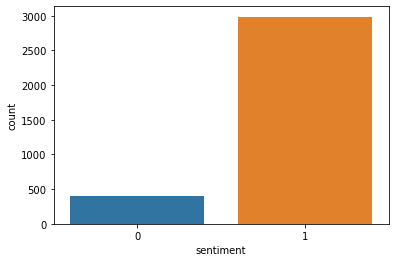

In [68]:
sns.countplot(x='sentiment',data=data2)

In [69]:
import nltk

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [71]:
def text_process(mess):
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [72]:
data2['reviews'] = data2['reviews'].apply(text_process)

In [73]:
data2.head()

,reviews,sentiment
0,"[got, going, walks, dog, feet, would, ones, ba...",1
1,"[air, monarch, good, shoe, long, time, perfect...",1
2,"[tried, baby, powder, trick, works, added, ins...",1
3,"[ordered, size, 15, wear, 14, still, small, ma...",0
4,"[know, saying, change, works, work, always, be...",1


In [74]:
#Stemming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [75]:
y = []
def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
    z = y[:]
    y.clear()
    return z

In [76]:
data2['reviews'] = data2['reviews'].apply(stem_words)

In [108]:
data2.head(10)

,reviews,sentiment
0,"[got, go, walk, dog, feet, would, one, bark, w...",1
1,"[air, monarch, good, shoe, long, time, perfect...",1
2,"[tri, babi, powder, trick, work, ad, insol, lo...",1
3,"[order, size, 15, wear, 14, still, small, manag]",0
4,"[know, say, chang, work, work, alway, best, pr...",1
5,"[love, shoe, wore, hike, rainbow, fall, gatlin...",1
6,"[want, 4e, wide, size, 10, got, regular, width...",1
7,"[second, pair, see, around, review, sneakerhea...",1
8,"[show, exactli, advertis, fit, perfectli]",1
9,"[issu, first, 2, 3, day, section, right, shoe,...",1


In [109]:
def join_back(list_input):
    return " ".join(list_input)

In [110]:
data2['reviews'] = data2['reviews'].apply(join_back)

In [111]:
data2.head()

,reviews,sentiment
0,got go walk dog feet would one bark would wear...,1
1,air monarch good shoe long time perfect better...,1
2,tri babi powder trick work ad insol local run ...,1
3,order size 15 wear 14 still small manag,0
4,know say chang work work alway best price found,1


In [112]:
from sklearn.feature_extraction.text import CountVectorizer

In [146]:
cv = CountVectorizer(max_features=1000)
X = cv.fit_transform(data2['reviews']).toarray()

In [147]:
X.shape

(3388, 1000)

In [148]:
y = data2.iloc[:,-1].values

In [149]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [150]:
#SPLITTING THE DATA

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [151]:
X_train.shape

(2710, 1000)

In [152]:
X_test.shape

(678, 1000)

In [153]:
y_train.shape

(2710,)

In [154]:
y_test.shape

(678,)

In [155]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

model1 = GaussianNB()
model2 = MultinomialNB()
model3 = BernoulliNB()

In [156]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

BernoulliNB()

In [157]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

In [158]:
from sklearn.metrics import accuracy_score

In [159]:
print("Gaussian ",accuracy_score(y_test,y_pred1))
print("MultinomialNB ",accuracy_score(y_test,y_pred2))
print("BernoulliNB ",accuracy_score(y_test,y_pred3))

Gaussian  0.5457227138643068
MultinomialNB  0.8805309734513275
BernoulliNB  0.8377581120943953
